In [222]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [223]:
df = pd.read_csv(ride_data_to_load)
df1 = pd.read_csv(city_data_to_load)
city = df['city']
city1 = df1['city']
dc1 = df1['driver_count']
ty1 = df1['type']
dc = []
ty = []
count = 0
for i in range(0,len(city)):
    dc.append(int(df1.loc[df1['city']==city[i]]['driver_count']))
    ty.append(df1.loc[df1['city']==city[i]]['type'].tolist())
df = df.join(pd.DataFrame(dc,columns=['driver_count']))
df = df.join(pd.DataFrame(ty,columns=['type']))
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

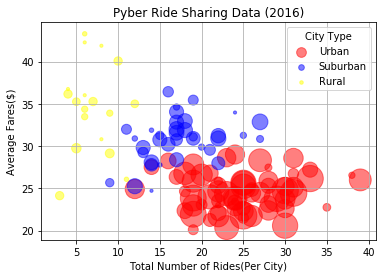

In [224]:
# Obtain the x and y coordinates for each of the three city types
df2 = df.drop_duplicates('city')
#driver count
d_c = df2['driver_count'].tolist()
d_c1 = []
d_c2=[]
d_c3=[]
#ride
x = df.groupby(['city'],sort=False).size().tolist()
x1=[]
x2=[]
x3=[]
#fare
y = df.groupby(['city'],sort=False)['fare'].mean().tolist()
y1=[]
y2=[]
y3=[]
#city type
city_type = df2['type'].tolist()
city_type1=[]
#df3 = pd.DataFrame(df2['city'].tolist(),columns=['city'])
#df3['driver_count'] = d_c
#df3['rides']=x.tolist()
#df3['fare']=y
#df3['type']=city_type.tolist()
#size = df3['driver_count'].rank()
for i in range(0,len(city_type)):
    if city_type[i]=='Urban':
        d_c1.append(d_c[i])
        x1.append(x[i])
        y1.append(y[i])
    if city_type[i]=='Suburban':
        d_c2.append(d_c[i])
        x2.append(x[i])
        y2.append(y[i])
    if city_type[i]=='Rural':
        d_c3.append(d_c[i])
        x3.append(x[i])
        y3.append(y[i])
d_c1 = pd.Series(d_c1)
d_c2 = pd.Series(d_c2)
d_c3 = pd.Series(d_c3)
plt.scatter(x1,y1,color='red',s=d_c1*10,alpha=0.5,label='Urban')
plt.scatter(x2,y2,color='blue',s=d_c2*10,alpha=0.5,label='Suburban')
plt.scatter(x3,y3,color='yellow',s=d_c3*10,alpha=0.5,label='Rural')



# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fares($)')
#plt.legend(handles = ['urban','suburban','rural'])

# Create a legend
plt.legend(title='City Type',markerscale=0.5)
plt.title('Pyber Ride Sharing Data (2016)')

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig('bubble plot.jpg')

In [225]:
# Show plot
plt.show()

## Total Fares by City Type

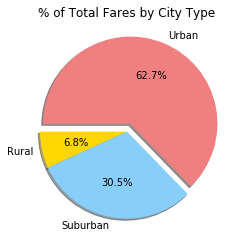

In [236]:
# Calculate Type Percents
df4 = pd.DataFrame(df.groupby('type')['fare'].sum()).apply(lambda x:x/x.sum())
# Build Pie Chart
labels = 'Rural', 'Suburban', 'Urban'
colors = 'Gold','lightskyblue','lightcoral'
fare = df4['fare'].tolist()
explode = (0,0,0.1)
plt.pie(fare, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, colors = colors,startangle=180)
plt.title('% of Total Fares by City Type')
plt.savefig('total fares by city type.jpg')
plt.show()
# Save Figure


In [237]:
# Show Figure
plt.show()

## Total Rides by City Type

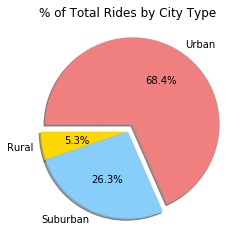

In [238]:
# Calculate Ride Percents
df4 = pd.DataFrame(df.groupby('type').size(),columns=['ride']).apply(lambda x:x/x.sum())
# Build Pie Chart
labels = 'Rural', 'Suburban', 'Urban'
colors = 'Gold','lightskyblue','lightcoral'
fare = df4['ride'].tolist()
explode = (0,0,0.1)
plt.pie(fare, labels=labels, explode=explode, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=180)
plt.title('% of Total Rides by City Type')
plt.savefig('total rides by city type.jpg')
plt.show()
# Save Figure


In [239]:
# Show Figure
plt.show()

## Total Drivers by City Type

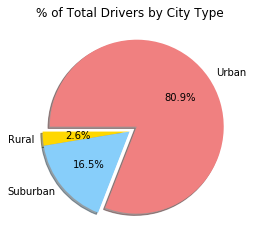

In [240]:
# Calculate Driver Percents
df4 = pd.DataFrame(df2.groupby('type')['driver_count'].sum()).apply(lambda x:x/x.sum())
labels = 'Rural', 'Suburban', 'Urban'
colors = 'Gold','lightskyblue','lightcoral'
fare = df4['driver_count'].tolist()
explode = (0,0,0.1)
plt.pie(fare, labels=labels, explode=explode, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=180)
plt.title('% of Total Drivers by City Type')
plt.savefig('total drivers by city type.jpg')
plt.show()


In [235]:
# Show Figure
plt.show()